Today we will explore a data set dedicated to the cost of treatment of different patients. The cost of treatment depends on many factors such as diagnosis, type of clinic, city of residence, age and so on. We have no data on the diagnosis of patients. But we have other information that can help us to make a conclusion about the health of patients and practice regression analysis.

## About the dataset 
### Columns

1. age: age of primary beneficiary
2. sex: insurance contractor gender, female, male
3. bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,objective index of body weight (kg / m^2) using the ratio of height to weight, ideally 18.5 to 24.9
4. children: Number of children covered by health insurance / Number of dependents
5. smoker: Smoking
6. region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
7. charges: Individual medical costs billed by health insurance


<b>Inspiration </b> 
To accurately predict insurance costs?

# Importing the Librabries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Data Collection & Analysis

In [25]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [26]:
# First 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [27]:
# Getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


A good day is when there is no "NaN"in the data!

Categorical Features:

- Sex
- Smoker
- Region

In [28]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [29]:
# Statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\215121745.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


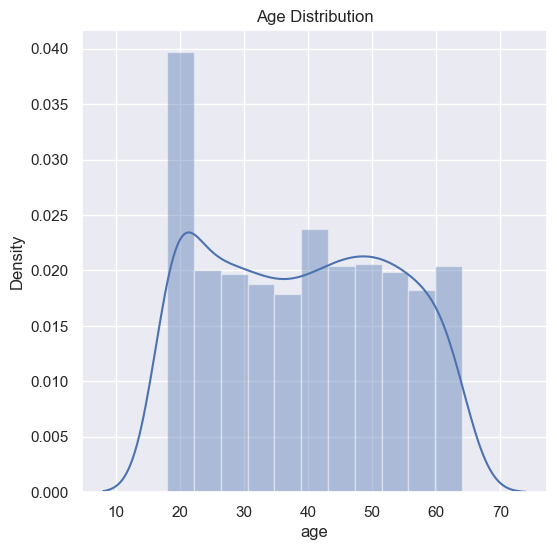

In [30]:
# Distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

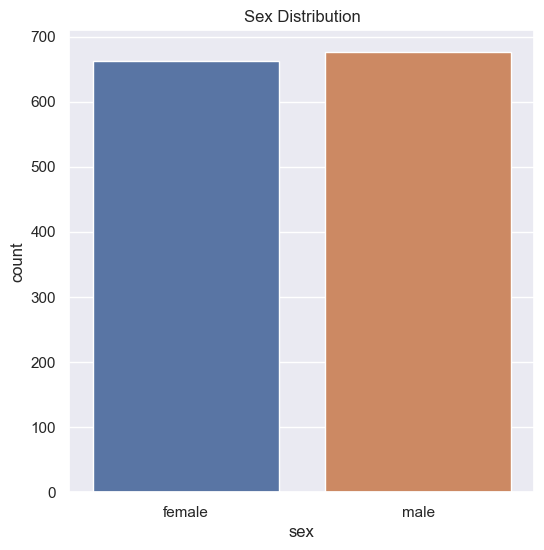

In [31]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [32]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\3578705264.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


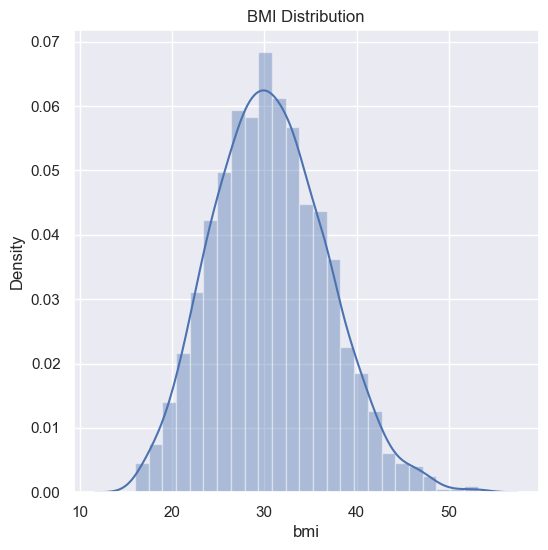

In [33]:
# Bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI Range --> 18.5 to 24.9

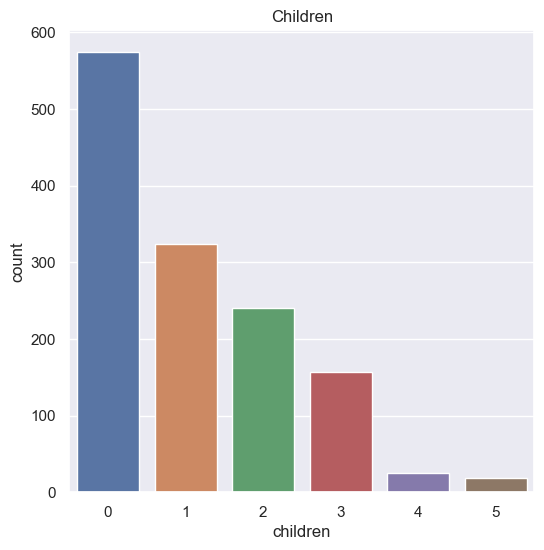

In [34]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()




In [35]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

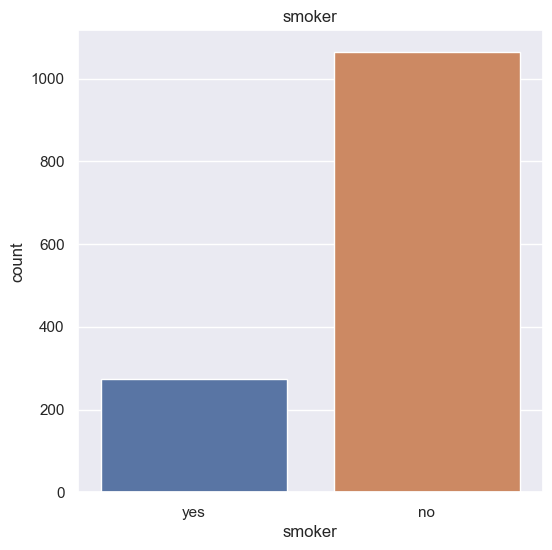

In [36]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [37]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

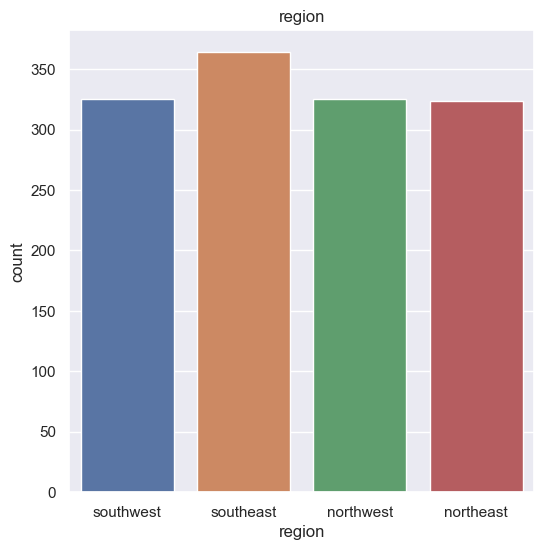

In [42]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()


In [22]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\905311768.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


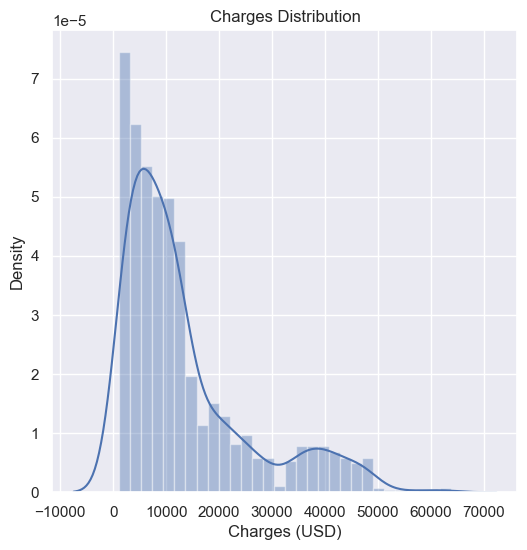

In [61]:
# Distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.xlabel('Charges (USD)')
plt.title('Charges Distribution')
plt.show()

In [75]:
insurance_dataset.corr()['charges'].sort_values()

smoker     -0.787251
sex        -0.057292
region     -0.056993
children    0.067998
bmi         0.198341
age         0.299008
charges     1.000000
Name: charges, dtype: float64

C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\2940456617.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot: >

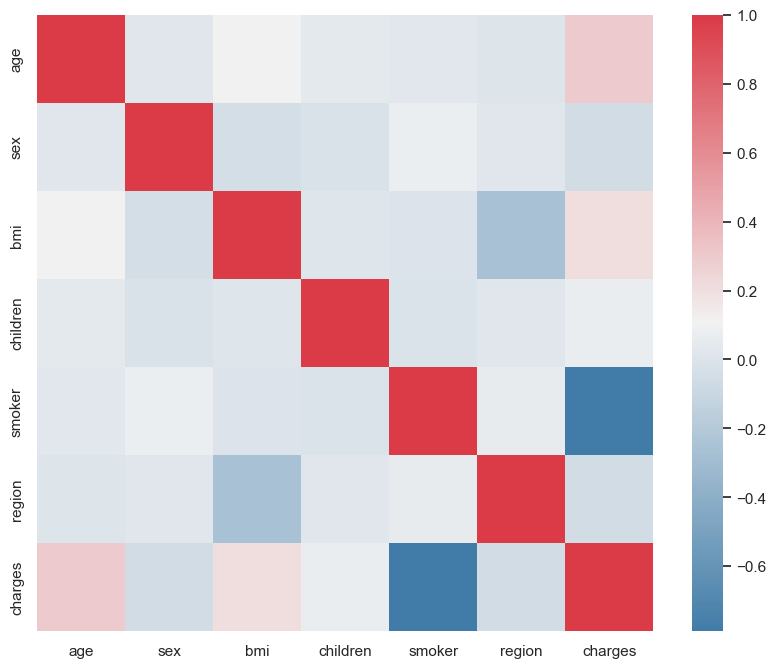

In [77]:
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance_dataset.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

A strong correlation is observed only with the fact of smoking the patient. We investigate smoking in more detail.

First, let's look at the distribution of charges. This will help us to know how much patients spend on treatment on average.

C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\1439853201.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset[(insurance_dataset.smoker == 1)]["charges"],color='c')


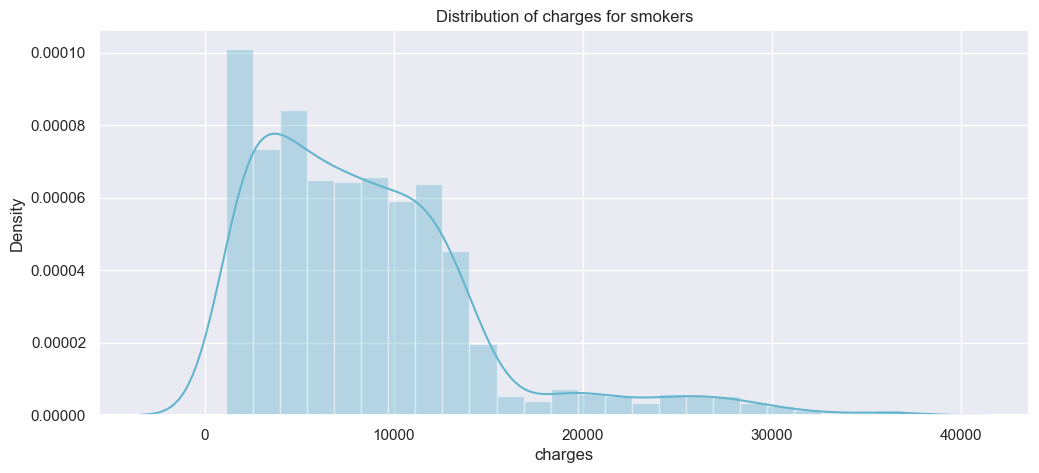

C:\Users\soumy\AppData\Local\Temp\ipykernel_25568\1439853201.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset[(insurance_dataset.smoker == 0)]['charges'],color='b')


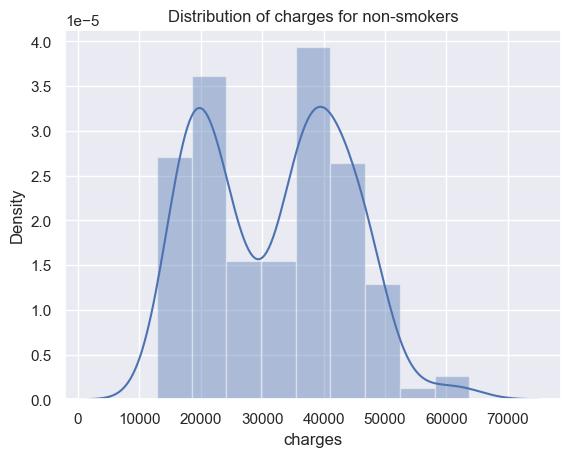

In [88]:
import os

f= plt.figure(figsize=(12,5))

# ax=f.add_subpltot(121)
sns.distplot(insurance_dataset[(insurance_dataset.smoker == 1)]["charges"],color='c')
plt.title('Distribution of charges for smokers')
plt.show()
# ax=f.add_subpltot(122)
sns.distplot(insurance_dataset[(insurance_dataset.smoker == 0)]['charges'],color='b')
plt.title('Distribution of charges for non-smokers')
plt.show()

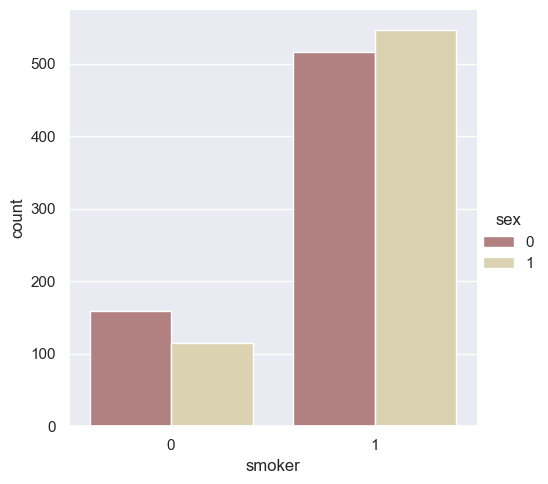

In [91]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=insurance_dataset)

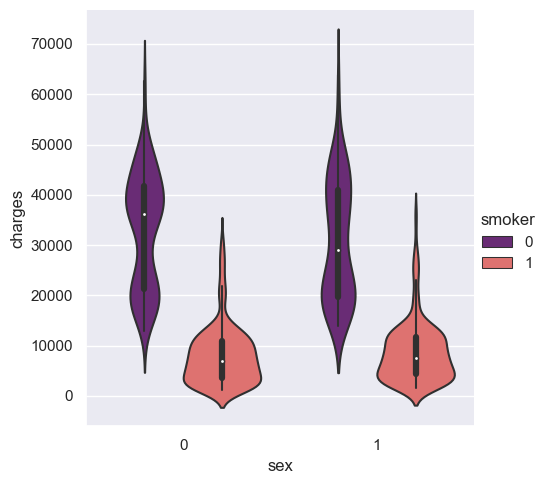

In [95]:
sns.catplot(x="sex", y="charges", hue="smoker",
            kind="violin", data=insurance_dataset, palette = 'magma')



<AxesSubplot: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

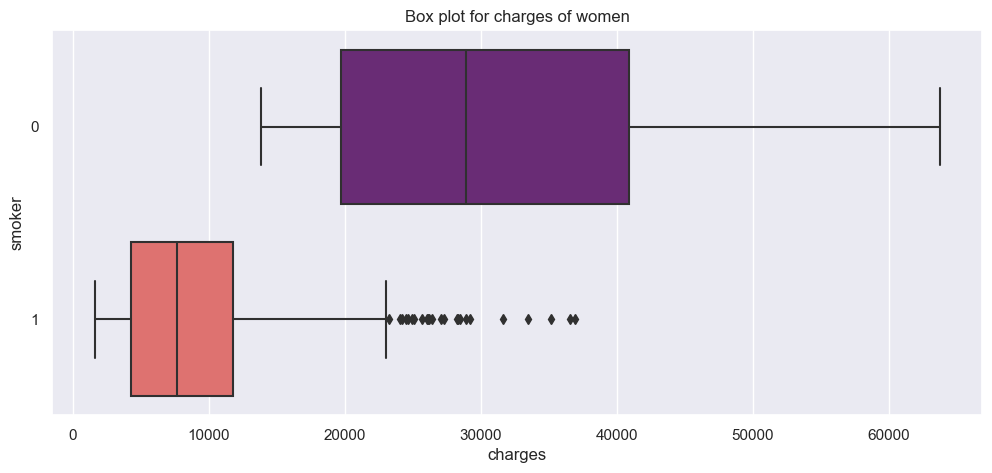

In [98]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data = insurance_dataset[(insurance_dataset.sex == 1)] , orient="h", palette = 'magma')

<AxesSubplot: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

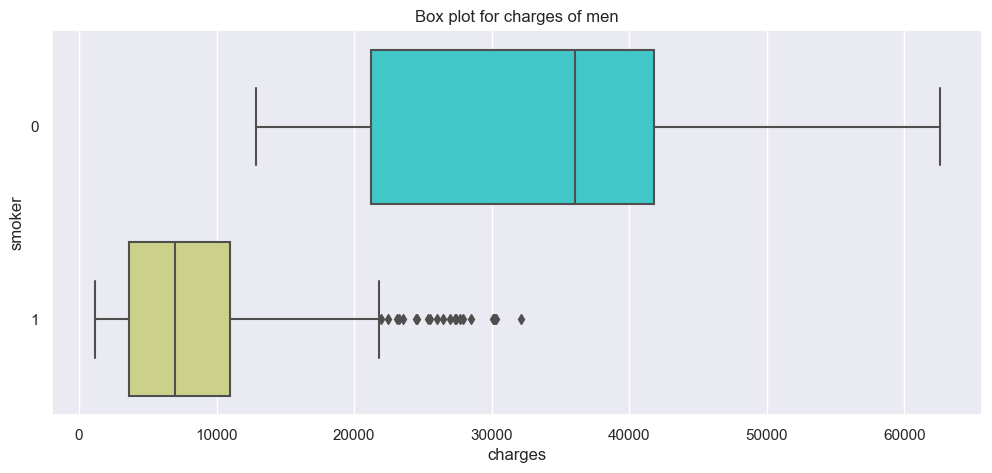

In [122]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  insurance_dataset[(insurance_dataset.sex == 0)] , orient="h", palette = 'rainbow')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

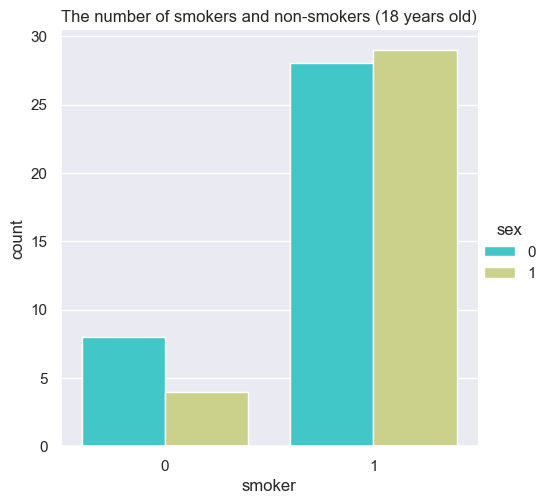

In [124]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=insurance_dataset[(insurance_dataset.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

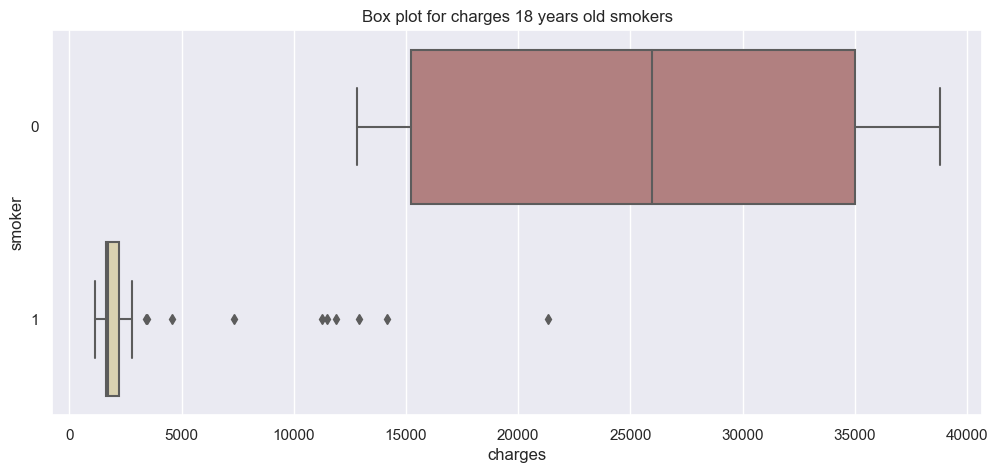

In [126]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = insurance_dataset[(insurance_dataset.age == 18)] , orient="h", palette = 'pink')

# Data Pre-Processing

## Encoding the categorical features

In [107]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance_dataset.sex.drop_duplicates()) 
insurance_dataset.sex = le.transform(insurance_dataset.sex)
# smoker or not
le.fit(insurance_dataset.smoker.drop_duplicates()) 
insurance_dataset.smoker = le.transform(insurance_dataset.smoker)
#region
le.fit(insurance_dataset.region.drop_duplicates()) 
insurance_dataset.region = le.transform(insurance_dataset.region)

In [108]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


## Splitting the Features and Target

In [99]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [100]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [101]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


## Splitting the data into Training data & Testing Data

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [110]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


## Model Training

### Linear Regression

In [104]:
# loading the Linear Regression model
regressor = LinearRegression()

In [105]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [106]:
regressor.score(X_test,Y_test)

0.7447273869684077

### Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(X_train,Y_train)
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)



C:\Users\soumy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


NameError: name 'r2_score' is not defined

### Model Evaluation

In [52]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [53]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [54]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [55]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684077


### Random Forest

In [115]:
print('R2 train data: %.3f, R2 test data: %.3f' % (
metrics.r2_score(Y_train,forest_train_pred),
metrics.r2_score(Y_test,forest_test_pred)))

R2 train data: 0.976, R2 test data: 0.838


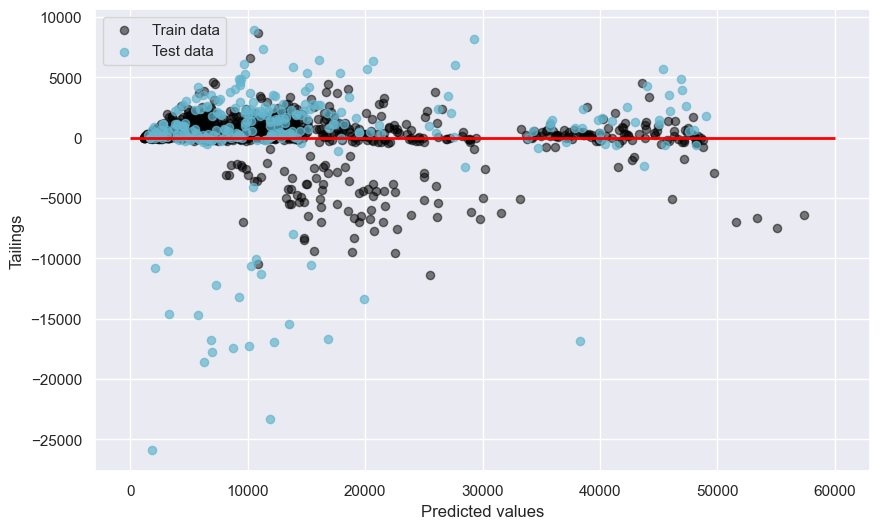

In [117]:
plt.figure(figsize=(10,6))

plt.scatter(forest_train_pred,forest_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(forest_test_pred,forest_test_pred - Y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')


plt.xlabel('Predicted values')
plt.ylabel('Tailings')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
plt.show()

## Building a Predictive System

In [119]:
input_data = (31,1,25.74,0,1,0)  # Age, sex,bmi,children,smoker,region

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The PREDICTED insurance cost is', prediction[0],'USD')

[3760.0805765]
The PREDICTED insurance cost is 3760.0805764960496 USD


C:\Users\soumy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [120]:
input_data = (31,1,25.74,0,1,0)  # Age, sex,bmi,children,smoker,region

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = forest.predict(input_data_reshaped)
print(prediction)

print('The PREDICTED insurance cost is', prediction[0],'USD')

[3969.3778859]
The PREDICTED insurance cost is 3969.377885900005 USD


C:\Users\soumy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
